# Nanodegree Engenheiro de Machine Learning
## Aprendizagem Supervisionada
## Projeto 2: Construindo um Sistema de Intervenção para Estudantes

Bem-vindo ao segundo projeto do Nanodegree de Machine Learning! Neste Notebook, alguns templates de código já foram fornecidos, e será o seu trabalho implementar funcionalidades necessárias para completar este projeto com êxito. Seções que começam com **'Implementação'** no cabeçalho indicam que o bloco de código que se segue precisará de funcionalidades adicionais que você deve fornecer. Instruções serão providenciadas para cada seção e as especificações para cada implementação estarão marcadas no bloco de código com o comando `'TODO'`. Tenha certeza de ler atentamente todas as instruções!

Além do código implementado, haverá questões relacionadas ao projeto e à implementação que você deve responder. Cada seção em que você tem que responder uma questão será antecedida de um cabeçalho **'Questão X'**. Leia atentamente cada questão e escreva respostas completas nas caixas de texto subsequentes que começam com **'Resposta: '**. O projeto enviado será avaliado baseado nas respostas para cada questão e a implementação que você forneceu.  

>**Nota:** Células de código e Markdown podem ser executadas utilizando o atalho de teclado **Shift + Enter**. Além disso, as células Markdown podem ser editadas, um clique duplo na célula entra no modo de edição.

### Questão 1 - Classificação versus Regressão
*Seu objetivo neste projeto é identificar estudantes que possam precisar de intervenção antecipada antes de serem reprovados. Que tipo de problema de aprendizagem supervisionada é esse: classificação ou regressão? Por quê?*

**Resposta: **

Este é um problema de classificação, pois envolve determinar quais alunos irão precisar de intervenção. Problemas típicos de regressão se referem a previsibilidade de séries numéricas, por exemplo, utilizando este mesmo contexto, seria para resolver um problema para determinar a quantidade de alunos que precisaríam de intervenção nos próximos meses.

## Observando os Dados
Execute a célula de código abaixo para carregar as bibliotecas de Python necessárias e os dados sobre os estudantes. Note que a última coluna desse conjunto de dados, `'passed'`, será nosso rótulo alvo (se o aluno foi ou não aprovado). As outras colunas são atributos sobre cada aluno.

In [1]:
# Importar bibliotecas
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score

# Ler os dados dos estudantes
student_data = pd.read_csv("student-data.csv")
print "Os dados dos estudantes foram lidos com êxito!"

Os dados dos estudantes foram lidos com êxito!


### Implementação: Observando os Dados
Vamos começar observando o conjunto de dados para determinar quantos são os estudantes sobre os quais temos informações e entender a taxa de graduação entre esses estudantes. Na célula de código abaixo, você vai precisar calcular o seguinte:
- O número total de estudantes, `n_students`.
- O número total de atributos para cada estudante, `n_features`.
- O número de estudantes aprovados, `n_passed`.
- O número de estudantes reprovados, `n_failed`.
- A taxa de graduação da classe, `grad_rate`, em porcentagem (%).


#### Dados dos estudantes

A tabela carregada exibida abaixo mostra a quantidade de linhas (amostras) e colunas (features) da base de dados de análise.

In [2]:
student_data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes
5,GP,M,16,U,LE3,T,4,3,services,other,...,yes,no,5,4,2,1,2,5,10,yes
6,GP,M,16,U,LE3,T,2,2,other,other,...,yes,no,4,4,4,1,1,3,0,yes
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,no,no,4,1,4,1,1,1,6,no
8,GP,M,15,U,LE3,A,3,2,services,other,...,yes,no,4,2,2,1,1,1,0,yes
9,GP,M,15,U,GT3,T,3,4,other,other,...,yes,no,5,5,1,1,1,5,0,yes


### Filtro de dados baseado nas colunas e teste simples de validação

In [3]:
students_passed = student_data[student_data['passed'] == "yes"].shape[0]
students_not_passed = student_data[student_data['passed'] == "no"].shape[0]

total = students_passed + students_not_passed

print "Total calculado " + str(total) + " Total esperado " + str(student_data.shape[0])

Total calculado 395 Total esperado 395


### Cálculo de taxa de graduação

In [4]:
taxa_graduacao = float(students_passed) / total
print str(round(taxa_graduacao*100, 3)) + " %"

67.089 %


In [5]:
# TODO: Calcule o número de estudante
n_students = student_data.shape[0]

# TODO: Calcule o número de atributos
# A últimoa coluna é a classe
n_features = student_data.shape[1] - 1 

# TODO: Calcule o número de alunos aprovados
n_passed = students_passed

# TODO: Calcule o número de alunos reprovados
n_failed = students_not_passed

# TODO: Calcule a taxa de graduação
grad_rate = taxa_graduacao * 100

# Imprima os resultados
print "Número total de estudantes: {}".format(n_students)
print "Número de atributos: {}".format(n_features)
print "Número de estudantes aprovados: {}".format(n_passed)
print "Número de estudantes reprovados: {}".format(n_failed)
print "Taxa de graduação: {:.2f}%".format(grad_rate)

Número total de estudantes: 395
Número de atributos: 30
Número de estudantes aprovados: 265
Número de estudantes reprovados: 130
Taxa de graduação: 67.09%


## Preparando os Dados
Nesta seção, vamos preparara os dados para modelagem, treinamento e teste.

### Identificar atributos e variáveis-alvo
É comum que os dados que você obteve contenham atributos não numéricos. Isso pode ser um problema, dado que a maioria dos algoritmos de machine learning esperam dados númericos para operar cálculos.

Execute a célula de código abaixo para separar os dados dos estudantes em atributos e variáveis-alvo e verificar se algum desses atributos é não numérico.

>**Nota para o Revisor:** quando utilizo no target_col o valor -1, não é carregado o label da coluna. Se coloco por range, 30:31, ele é exibido. Sem isso a função de subsituição não funciona adequadamente.

In [6]:
len(student_data.columns)
target_col = (student_data.columns[-1])
student_data[target_col]

0       no
1       no
2      yes
3      yes
4      yes
5      yes
6      yes
7       no
8      yes
9      yes
10      no
11     yes
12     yes
13     yes
14     yes
15     yes
16     yes
17     yes
18      no
19     yes
20     yes
21     yes
22     yes
23     yes
24      no
25      no
26     yes
27     yes
28     yes
29     yes
      ... 
365    yes
366    yes
367     no
368    yes
369    yes
370     no
371    yes
372    yes
373     no
374    yes
375    yes
376    yes
377    yes
378    yes
379    yes
380    yes
381     no
382    yes
383     no
384     no
385    yes
386     no
387     no
388     no
389     no
390     no
391    yes
392     no
393    yes
394     no
Name: passed, Length: 395, dtype: object

In [7]:
len(student_data.columns)
target_col = (student_data.columns[30:31])
student_data[target_col]

,passed
0,no
1,no
2,yes
3,yes
4,yes
5,yes
6,yes
7,no
8,yes
9,yes


In [8]:
# Extraia as colunas dos atributos
feature_cols = list(student_data.columns[:-1])

# Extraia a coluna-alvo 'passed'
#Desta forma o nome da coluna é ignorado
#target_col = student_data.columns[-1] 
target_col = student_data.columns[30:31] 

# Mostre a lista de colunas
print "Colunas de atributos:\n{}".format(feature_cols)
print "\nColuna-alvo: {}".format(target_col)

# Separe os dados em atributos e variáveis-alvo (X_all e y_all, respectivamente)
X_all = student_data[feature_cols]
y_all = student_data[target_col]

# Mostre os atributos imprimindo as cinco primeiras linhas
print "\nFeature values:"
print X_all.head()

Colunas de atributos:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Coluna-alvo: Index([u'passed'], dtype='object')

Feature values:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

    ...    higher internet  romantic  famrel  freetime goout Dalc Walc health  \
0   ...       yes       no        no       4         3     4    

### Pré-processar Colunas de Atributo

Como você pode ver, há muitas colunas não numéricas que precisam ser convertidas! Muitas delas são simplesmente `yes`/`no`, por exemplo, a coluna `internet`. É razoável converter essas variáveis em valores (binários) `1`/`0`.

Outras colunas, como `Mjob` e `Fjob`, têm mais do que dois valores e são conhecidas como variáveis categóricas. A maneira recomendada de lidar com esse tipo de coluna é criar uma quantidade de colunas proporcional aos possíveis valores (por exemplo, `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc), e assinalar `1` para um deles e `0` para todos os outros.

Essas colunas geradas são por vezes chamadas de _variáveis postiças_ (_dummy variables_), e nós iremos utilizar a função [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) para fazer essa conversão. Execute a célula de código abaixo para executar a rotina de pré-processamento discutida nesta seção.

In [9]:
def preprocess_features(X):
    ''' Pré-processa os dados dos estudantes e converte as variáveis binárias não numéricas em
        variáveis binárias (0/1). Converte variáveis categóricas em variáveis postiças. '''
    
    # Inicialize nova saída DataFrame
    output = pd.DataFrame(index = X.index)

    # Observe os dados em cada coluna de atributos 
    for col, col_data in X.iteritems():

        # Se o tipo de dado for não numérico, substitua todos os valores yes/no por 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # Se o tipo de dado for categórico, converta-o para uma variável dummy
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Reúna as colunas revisadas
        output = output.join(col_data)
    return output

X_all = preprocess_features(X_all)
print "Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns))

y_all = preprocess_features(y_all)
print "Processed feature columns ({} total features):\n{}".format(len(y_all.columns), list(y_all.columns))

Processed feature columns (48 total features):
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']
Processed feature columns (1 total features):
['passed']


### Implementação: Divisão dos Dados de Treinamento e Teste
Até agora, nós convertemos todos os atributos _categóricos_ em valores numéricos. Para o próximo passo, vamos dividir os dados (tanto atributos como os rótulos correspondentes) em conjuntos de treinamento e teste. Na célula de código abaixo, você irá precisar implementar o seguinte:
- Embaralhe aleatoriamente os dados (`X_all`, `y_all`) em subconjuntos de treinamento e teste.
  - Utilizar 300 pontos de treinamento (aproxidamente 75%) e 95 pontos de teste (aproximadamente 25%).
  - Estabelecer um `random_state` para as funções que você utiliza, se a opção existir.
  - Armazene os resultados em `X_train`, `X_test`, `y_train` e `y_test`.

In [10]:
# TODO: Importe qualquer funcionalidade adicional de que você possa precisar aqui
from sklearn.model_selection import train_test_split

# TODO: Estabeleça o número de pontos de treinamento
num_train = 300

# Estabeleça o número de pontos de teste
num_test = X_all.shape[0] - num_train

# TODO: Emabaralhe e distribua o conjunto de dados de acordo com o número de pontos de treinamento e teste abaixo
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=num_test, random_state=42, stratify=y_all)

# Mostre o resultado da distribuição
print "O conjunto de treinamento tem {} amostras.".format(X_train.shape[0])
print "O conjunto de teste tem {} amostras.".format(X_test.shape[0])

O conjunto de treinamento tem 300 amostras.
O conjunto de teste tem 95 amostras.


In [11]:
X_test

,school_GP,school_MS,sex_F,sex_M,age,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
286,1,0,1,0,18,0,1,1,0,0,...,1,1,0,4,3,3,1,2,2,5
208,1,0,1,0,16,0,1,1,0,0,...,1,0,0,4,3,2,1,4,5,6
92,1,0,1,0,16,0,1,0,1,0,...,1,0,0,3,3,3,2,3,2,4
305,1,0,1,0,18,0,1,1,0,0,...,1,1,0,4,4,3,1,1,3,8
193,1,0,0,1,16,1,0,1,0,0,...,1,1,0,4,3,2,3,4,5,8
6,1,0,0,1,16,0,1,0,1,0,...,1,1,0,4,4,4,1,1,3,0
199,1,0,1,0,16,0,1,0,1,0,...,1,1,0,4,5,2,1,2,3,0
283,1,0,1,0,18,0,1,1,0,0,...,1,1,0,5,4,4,1,1,4,4
54,1,0,1,0,15,0,1,0,1,1,...,1,1,0,5,3,4,4,4,1,6
366,0,1,0,1,18,0,1,0,1,0,...,1,1,1,4,2,2,2,2,5,0


In [12]:
y_test

,passed
286,1
208,1
92,0
305,1
193,1
6,1
199,1
283,1
54,1
366,1


## Treinando e Avaliando Modelos
Nesta seção, você irá escolher 3 modelos de aprendizagem supervisionada que sejam apropriados para esse problema e que estejam disponíveis no `scikit-learn`. Primeiro você irá discutir o raciocínio por trás da escolha desses três modelos considerando suas vantagens e desvantagens e o que você sabe sobre os dados. Depois você irá ajustar o modelo a diferentes tamanhos de conjuntos de treinamento (com 100, 200 e 300 pontos) e medir a pontuação F<sub>1</sub>. Você vai precisar preencher três tabelas (uma para cada modelo) que mostrem o tamanho do conjunto de treinamento, o tempo de treinamento, o tempo de previsão e a pontuação F<sub>1</sub> no conjunto de treinamento.

**Os seguintes modelos de aprendizagem supervisionada estão atualmente disponíveis no **[`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html)** para você escolher:**
- Gaussian Naive Bayes (GaussianNB)
- Árvores de Decisão
- Métodos de agregação (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Método do gradiente estocástico (SGDC)
- Máquinas de vetores de suporte (SVM)
- Regressão logística

### Questão 2 - Aplicação dos Modelos
*Liste três modelos de aprendizagem supervisionada que são apropriadas para esse problema. Para cada modelo escolhido:*
- Descreva uma aplicação em mundo real na indústria em que o modelo pode ser aplicado. *(Talvez você precise fazer um pouco de pesquisa para responder essa questão – dê as devidas referências!)* 
- Quais são as vantagens do modelo; quando ele tem desempenho melhor? 
- Quais são as desvantagens do modelo, quando ele tem desempenho pior?
- O que faz desse modelo um bom candidato para o problema, considerando o que você sabe sobre os dados?

**Resposta: **

Os modelos escolhidos foram: **Gaussian Naive Bayes**, **Máquinas de Vetores de Suporte (SVM)** e **Random Forest (Método de Agregação)**.

**Gaussian Naive Bayes**

É utilizado em aplicaçõe que envolvem categorização de textos, como por exemplo em máquinas de detecção de Spam (*https://pdfs.semanticscholar.org/819f/041832aa2c3f22e2e182183a08c0281dda0a.pdf*), categorização de notícias ou artigos (*http://ijoes.vidyapublications.com/paper/Vol13/39-Vol13.pdf*) e diagnósticos médicos (* https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5203736/*), dentre outros.

Este tipo de algoritmo tem como principais vantagens a independência das variáveis envolvidas, ou seja, cada característica é capaz de contribuir individulamente para a probabilidade de cálculo de determinadas classes. Devido a esta característica, não são requeridos muitos exemplos de treinamento quando comparamos com o algoritmo de regressão logística, por exemplo.
Além disso, este classificador foi projeto para lidar com múltiplas classes e, devido as simplificações tem menor tempo de execução nas fases de treinamento e teste em comparação a algoritmos mais complexos, como as máquinas de vetores de suporte (SVM).

Possui a desvatangem de assumir independência de variáveis quando no mundo real elas tendem a ser dependentes. 
As simplificações utilizadas para cálculos de probabilidades o tornam, como estimador, pouco preciso, portanto é recomendável utilizar apenas o resultado final de qual classe tem a maior probabilidade do que seu valor.

O principal fator para escolhermos este algoritmo é que devida sua simplicidade é um bom ponto de partida para iniciarmos as análises. A quantidade de exemplos disponíveis também contribuem para a escolha deste algoritmo.

**Máquinas de Vetores de Suporte (SVM)**

As Máquinas de Vetores de Suporte ou simplesmente SVM tem aplicação mais utilizada no ramo de identificação de padrões, sobretudo em imagens. Por exemplo, na área de imagens médicas, possui diversos casos de uso onde é possível identificar padrões que podem indicar evolução para diferentes tipos de enfermidades, seja em imagens de duas dimensões como por exemplo um simples raio-x (*http://ieeexplore.ieee.org/document/7424297/*) ou até mesmo imagens volumétricas, de três dimensões de uma ressonância magnética (* http://omnipax.com.br/livros/2012/AVC/avc-livro.pdf, capítulo 1*).

A base do SVM é a sua característica principal em maximizar a separação entre duas classes, o que chamamos de uma classificação binária. Esta característica permite escolher, dentre os elementos dos conjuntos de análise no processo de separação, somente os elementos que maximizam a separação entre as classes, que são chamados de vetores de suporte.
Com isto, o SVM é robusto e eficiente ao lidar com problemas onde existe uma grande dimensionalidade, seja em atributos ou em exemplos de treinamento, da ordem de milhões.
Outro ponto a ser destacado é o uso das funções kernel para separar classes que não sejam linearmente separáveis num mesmo plano. A técnica consiste em criar um novo hiperplano para que seja possível separar as duas classes com uma função linear.

Apesar do SVM ser robusto ao criar um modelo com grande dimensionalidade pode levar mais tempo que outros classificadores, como por exemplo as Árvores de Decisão na etapa de treinamento.
A escolha da função kernel apropriada pode levar tempo pois requer maior estudo dos dados envolvidos. Adicionalmente é necessário realizar diversas tarefas de regularização do modelo, portanto sua configuração não é trivial como Naive Bayes ou ainda como as Árvores de Decisão.

Até este ponto ainda não sabemos se este algoritmo é o melhor para separar as classes dos dados apresentados. O principal motivo de ter sido escolhido é para ser uma alternativa viável caso as classes se encontrem em separação não linear.

**Random Forest (Método de Agregação)**

O algoritmo de Random Forest, ou RF, é uma agregação de diversas Árvores de Decisão com o objetivo de torná-las mais eficientes e as otimizando.

As Árvores de Decisão ou DT, do termo Decision Tree em inglês, representam um dos mais simples algoritmos, pois é composto de uma série de perguntas e respostas dispostas em forma de árvore binária, ou seja, com apenas duas ramificações.

Sua aplicação está relacionada nas áreas de Discovery Knowledge especialmente nos casos de uso de suporte técnico (*http://ieeexplore.ieee.org/document/5994250/*), sistemas de recomendação (*https://subs.emis.de/LNI/Proceedings/Proceedings165/170.pdf*), sistemas especialistas de seguros (*http://article.sapub.org/10.5923.j.statistics.20170702.07.html*), diagnósticos médicos (*https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2263124/*), dentre outros.

A grande vantagem das DT é sua simplicidade de construção, pois não requer muitos ajustes ou regularizações. Sua forma gráfica de representar o modelo também contribui para se tornar um dos classificadores de mais fácil entendimento. 

Independente da separação ser linear ou não linear, o esforço envolvido para construção do modelo é similar, portanto não há maior esforço computacional quando a separação for do tipo não linear.

Uma das limitações mais importantes das DT é relacionado ao *overfitting* devido a natureza do classificador, onde a fronteira de decisão tende a ser paralelo aos eixos existentes do plano de amostras. Sem um ajuste de *pruning*, por exemplo, podem haver distorções na fronteira de decisão que pode prejudicar distribuições suaves. Este efeito também pode ser minimizado com o uso dos *ensemble models*, como o RF.

O RF será utilizado neste conjunto de dados para testar se é possível separar as diferentes classes com o mínimo de esforço possível num modelo que sejam facilmente explicável por representação gráfica.


### Configuração
Execute a célula de código abaixo para inicializar três funções de ajuda que você pode utilizar para treinar e testar os três modelos de aprendizagem supervisionada que você escolheu acima. As funções são as seguintes:
- `train_classifier` - recebe como parâmetro um classificador e dados de treinamento e ajusta o classificador aos dados.
- `predict_labels` - recebe como parâmetro um classificador ajustado, atributos e rótulo alvo e faz estimativas utilizando a pontuação do F<sub>1</sub>.
- `train_predict` - recebe como entrada um classificador, e dados de treinamento e teste, e executa `train_clasifier` e `predict_labels`.
 - Essa função vai dar a pontuação F<sub>1</sub> tanto para os dados de treinamento como para os de teste, separadamente.

In [13]:
def train_classifier(clf, X_train, y_train):
    ''' Ajusta um classificador para os dados de treinamento. '''
    
    # Inicia o relógio, treina o classificador e, então, para o relógio
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Imprime os resultados
    print "O modelo foi treinado em {:.4f} segundos".format(end - start)

    
def predict_labels(clf, features, target):
    ''' Faz uma estimativa utilizando um classificador ajustado baseado na pontuação F1. '''
    
    # Inicia o relógio, faz estimativas e, então, o relógio para
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Imprime os resultados de retorno
    print "As previsões foram feitas em {:.4f} segundos.".format(end - start)
    return f1_score(target.values, y_pred, pos_label=1)

def predictions(clf, features):
    ''' Faz uma estimativa utilizando um classificador ajustado baseado na pontuação F1. '''
    
    # Inicia o relógio, faz estimativas e, então, o relógio para
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Imprime os resultados de retorno
    print "As previsões foram feitas em {:.4f} segundos.".format(end - start)
    return y_pred


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Treina e faz estimativas utilizando um classificador baseado na pontuação do F1. '''
    
    # Indica o tamanho do classificador e do conjunto de treinamento
    print "Treinando um {} com {} pontos de treinamento. . .".format(clf.__class__.__name__, len(X_train))
    
    # Treina o classificador
    train_classifier(clf, X_train, y_train.values.ravel())
    
    # Imprime os resultados das estimativas de ambos treinamento e teste
    print "Pontuação F1 para o conjunto de treino: {:.4f}.".format(predict_labels(clf, X_train, y_train))
    print "Pontuação F1 para o conjunto de teste: {:.4f}.".format(predict_labels(clf, X_test, y_test))

### Implementação: Métricas de Desempenho do Modelo
Com as funções acima, você vai importar os três modelos de aprendizagem supervisionada de sua escolha e executar a função `train_prediction` para cada um deles. Lembre-se de que você vai precisar treinar e usar cada classificador para três diferentes tamanhos de conjuntos de treinamentos: 100, 200 e 300 pontos. Então você deve ter 9 saídas diferentes abaixo – 3 para cada modelo utilizando cada tamanho de conjunto de treinamento. Na célula de código a seguir, você deve implementar o seguinte:
- Importe os três modelos de aprendizagem supervisionada que você escolheu na seção anterior.
- Inicialize os três modelos e armazene eles em `clf_A`, `clf_B` e `clf_C`.
 - Defina um `random_state` para cada modelo, se a opção existir.
 - **Nota:** Utilize as configurações padrão para cada modelo – você vai calibrar um modelo específico em uma seção posterior.
- Crie diferentes tamanhos de conjuntos de treinamento para treinar cada modelo.
 - *Não embaralhe e distribua novamente os dados! Os novos pontos de treinamento devem ser tirados de `X_train` e `y_train`.*
- Treine cada modelo com cada tamanho de conjunto de treinamento e faça estimativas com o conjunto de teste (9 vezes no total).  
**Nota:** Três tabelas são fornecidas depois da célula de código a seguir, nas quais você deve anotar seus resultados.

In [14]:
# TODO: Importe os três modelos de aprendizagem supervisionada do sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

# TODO: Inicialize os três modelos
clf_A = GaussianNB()
clf_B = svm.SVC(random_state=0)
clf_C = RandomForestClassifier(random_state=0)

# TODO: Configure os tamanho dos conjuntos de treinamento
for clf in [clf_A, clf_B, clf_C]:
    print "Treinando " + str(clf) + "\n"
    for n_train in [100, 200, 300]:
        train_predict(clf, X_train[:n_train], y_train[:n_train], X_test, y_test)
        print "\n"
    print "\n\n"

Treinando GaussianNB(priors=None)

Treinando um GaussianNB com 100 pontos de treinamento. . .
O modelo foi treinado em 0.0015 segundos
As previsões foram feitas em 0.0008 segundos.
Pontuação F1 para o conjunto de treino: 0.7752.
As previsões foram feitas em 0.0007 segundos.
Pontuação F1 para o conjunto de teste: 0.6457.


Treinando um GaussianNB com 200 pontos de treinamento. . .
O modelo foi treinado em 0.0012 segundos
As previsões foram feitas em 0.0008 segundos.
Pontuação F1 para o conjunto de treino: 0.8060.
As previsões foram feitas em 0.0006 segundos.
Pontuação F1 para o conjunto de teste: 0.7218.


Treinando um GaussianNB com 300 pontos de treinamento. . .
O modelo foi treinado em 0.0013 segundos
As previsões foram feitas em 0.0006 segundos.
Pontuação F1 para o conjunto de treino: 0.8134.
As previsões foram feitas em 0.0003 segundos.
Pontuação F1 para o conjunto de teste: 0.7761.





Treinando SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='o

### Resultados em tabelas
Edite a célula abaixo e veja como a tabela pode ser desenhada em [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables). Você deve salvar seus resultados abaixo nas tabelas fornecidas.

** Classificador 1 - Naive Bayes (Gaussian)**  

| Tamanho do Conjunto de Treinamento | Tempo de Treinamento | Tempo de Estimativa (teste) | Pontuação F1 (treinamento) | Pontuação F1 (teste) |
| :--------------------------------: | :------------------: | :-------------------------: | :------------------------: | :------------------: |
| 100                                |  0.0013s                    |  0.0005s                           |  0.8467                          |     0.8029                 |
| 200                                |       0.0013s        |       0.0005s                      |     0.8406                      |         0.7244             |
| 300                                |    0.0016s                  |       0.0004s                      |     0.8038                      |        0.7634       |

** Classificador 2 - Máquinas de Vetores de Suporte (SVM)**  

| Tamanho do Conjunto de Treinamento | Tempo de Treinamento | Tempo de Estimativa (teste) | Pontuação F1 (treinamento) | Pontuação F1 (teste) |
| :--------------------------------: | :------------------: | :-------------------------: | :------------------------: | :------------------: |
| 100                                |   0.0013s                   |     0.0008s                        |    0.8777                      |       0.7746                |
| 200                                |       0.0031s        |     0.0016s                        |  0.8679                         |       0.7815              |
| 300                                |   0.0070s                   |    0.0018s                         |   0.8761                         |        0.7838       |

** Classificador 3 - Random Forest **  

| Tamanho do Conjunto de Treinamento | Tempo de Treinamento | Tempo de Estimativa (teste) | Pontuação F1 (treinamento) | Pontuação F1 (teste) |
| :--------------------------------: | :------------------: | :-------------------------: | :------------------------: | :------------------: |
| 100                                |  0.0376s                    |     0.0010s                        |    0.9922                       |       0.6614               |
| 200                                |    0.0373s                  |   0.0014s                          |   0.9964                         |     0.7536                 |
| 300                                |    0.0405s                  |           0.0019s                  |   0.9927                         |     0.7407                 |

## Escolhendo o Melhor Modelo
Nesta seção final, você irá escolher dos três modelos de aprendizagem supervisionada o *melhor* para utilizar os dados dos estudantes. Você então executará um busca em matriz otimizada para o modelo em todo o conjunto de treinamento (`X_train` e `y_train`) ao calibrar pelo menos um parâmetro, melhorando em comparação a pontuação F<sub>1</sub> do modelo não calibrado. 

### Questão 3 - Escolhendo o Melhor Modelo
*Baseando-se nos experimentos que você executou até agora, explique em um ou dois parágrafos ao conselho de supervisores qual modelo que você escolheu como o melhor. Qual modelo é o mais apropriado baseado nos dados disponíveis, recursos limitados, custo e desempenho?*

**Resposta: **

O algoritmo de classificação de Máquinas de Vetores de Suporte (SVM) foi o que apresentou melhor performance de pontuação F1, atingindo 81,25% para um conjunto de treinmento de 200 amostras, versus 71,1% quando comparado com o algoritmo Naive Bayes (distribuição gaussiana) e 69,84% do algoritmo de Random Forest.
No aspecto no tempo de treinamento e avaliação, o SVM é o segundo mais oneroso dentre os três. O SVM levou 0,0084s para a etapa de treinamento de 300 amostras versus 0,0023s do Naive Bayes e 0,0363s do Random Forest.

Em função da maior pontuação F1 dentre os três e o tempo de execução ser razoável, o algoritmo escolhido é de Máquinas de Vetores de Suporte (SVM).

### Questão 4 – O Modelo para um Leigo
*Em um ou dois parágrafos, explique para o conselho de supervisores, utilizando termos leigos, como o modelo final escolhido deve trabalhar. Tenha certeza que você esteja descrevendo as melhores qualidades do modelo, por exemplo, como o modelo é treinado e como ele faz uma estimativa. Evite jargões técnicos ou matemáticos, como descrever equações ou discutir a implementação do algoritmo.*

**Resposta: **

O classificador de Máquinas de Vetores de Suporte (SVM) possui a característica de maximizar a separação entre duas classes, por este motivo é conhecido como um classificador do tipo binário. 
Para maxmimizar a separação das classes o classificador utiliza somente as amostras que estão na fronteira de decisão, escolhendo as que separam mais as duas classes. As amostras mais distantes da fronteira de decisão não contribuem para a separação das classes.
Outro aspecto importante do SVM é o truque de kernel, onde é possível transportar as amostras para outro plano onde classes linearmente não separáveis se tornam linearmente separáveis, ou seja, elas conseguiriam se separadas como uma reta.
Para o conjunto de dados em questão, o SVM conseguiu melhor performance na separação dos dados utilizando tais técnicas.

### Implementação: Calibrando o Modelo (_Tuning_)
Calibre o modelo escolhido. Utilize busca em matriz (`GridSearchCV`) com, pelo menos, um parâmetro importante calibrado com, pelo menos, 3 valores diferentes. Você vai precisar utilizar todo o conjunto de treinamento para isso. Na célula de código abaixo, você deve implementar o seguinte:
- Importe [`sklearn.grid_search.gridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) e [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Crie o dicionário de parâmetros que você deseja calibrar para o modelo escolhido.
 - Examplo: `parameters = {'parameter' : [list of values]}`.
- Inicialize o classificador que você escolheu e armazene-o em `clf`.
- Crie a função de pontuação F<sub>1</sub> utilizando `make_scorer` e armazene-o em `f1_scorer`.
 - Estabeleça o parâmetro `pos_label` para o valor correto!
- Execute uma busca em matriz no classificador `clf` utilizando o `f1_scorer` como método de pontuação e armazene-o em `grid_obj`.
- Treine o objeto de busca em matriz com os dados de treinamento (`X_train`, `y_train`) e armazene-o em `grid_obj`.

In [15]:
# TODO: Importe 'GridSearchCV' e 'make_scorer'
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.model_selection import ShuffleSplit
from scipy.stats import expon 

# TODO: Crie a lista de parâmetros que você gostaria de calibrar
parameters = [
    {'kernel': ['linear'], 'C': [1, 10, 100]}]

# TODO: Inicialize o classificador
clf = svm.SVC(random_state=0)

# TODO: Faça uma função de pontuação f1 utilizando 'make_scorer' 
f1_scorer = make_scorer(f1_score, pos_label=1)

# TODO: Execute uma busca em matriz no classificador utilizando o f1_scorer como método de pontuação
cv_sets = ShuffleSplit(X_train.shape[0], test_size = 0.20, random_state = 40)
grid_obj = GridSearchCV(clf, parameters, scoring=f1_scorer, cv=cv_sets)

# TODO: Ajuste o objeto de busca em matriz para o treinamento de dados e encontre os parâmetros ótimos
grid_obj =  grid_obj.fit(X_train, y_train.values.ravel())

# Get the estimator
clf = grid_obj.best_estimator_

# Best parameters
print "Melhores parâmetros encontrados"
print grid_obj.best_params_

# Reporte a pontuação final F1 para treinamento e teste depois de calibrar os parâmetrosprint "Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train))
print "O modelo calibrado tem F1 de {:.4f} no conjunto de treinamento.".format(predict_labels(clf, X_train, y_train))
print "O modelo calibrado tem F1 de {:.4f} no conjunto de teste.".format(predict_labels(clf, X_test, y_test))

Melhores parâmetros encontrados
{'kernel': 'linear', 'C': 1}
As previsões foram feitas em 0.0022 segundos.
O modelo calibrado tem F1 de 0.8447 no conjunto de treinamento.
As previsões foram feitas em 0.0008 segundos.
O modelo calibrado tem F1 de 0.7626 no conjunto de teste.


Text(0.5,24,u'Predicted')

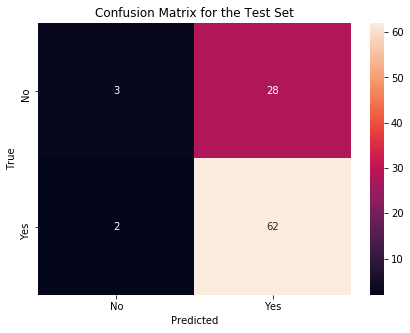

In [18]:
import seaborn as sns # Install using 'pip install seaborn'
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

cm_test = confusion_matrix(y_test, clf.predict(X_test))

plt.figure(figsize=(7,5))
sns.heatmap(cm_test, annot=True, xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix for the Test Set')
plt.ylabel('True')
plt.xlabel('Predicted')

In [17]:
# TODO: Importe 'GridSearchCV' e 'make_scorer'
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.model_selection import ShuffleSplit

# TODO: Crie a lista de parâmetros que você gostaria de calibrar
parameters = {}

# TODO: Inicialize o classificador
clf = svm.SVC(random_state=0)

# TODO: Faça uma função de pontuação f1 utilizando 'make_scorer' 
f1_scorer = make_scorer(f1_score, pos_label=1)

# TODO: Execute uma busca em matriz no classificador utilizando o f1_scorer como método de pontuação
cv_sets = ShuffleSplit(X_train.shape[0], test_size = 0.20, random_state = 40)
grid_obj = GridSearchCV(clf, parameters, f1_scorer, cv=cv_sets)

# TODO: Ajuste o objeto de busca em matriz para o treinamento de dados e encontre os parâmetros ótimos
grid_obj =  grid_obj.fit(X_train, y_train.values.ravel())

# Get the estimator
clf = grid_obj.best_estimator_

# Reporte a pontuação final F1 para treinamento e teste depois de calibrar os parâmetrosprint "Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train))
print "O modelo calibrado tem F1 de {:.4f} no conjunto de treinamento.".format(predict_labels(clf, X_train, y_train))
print "O modelo calibrado tem F1 de {:.4f} no conjunto de teste.".format(predict_labels(clf, X_test, y_test))

As previsões foram feitas em 0.0035 segundos.
O modelo calibrado tem F1 de 0.8664 no conjunto de treinamento.
As previsões foram feitas em 0.0015 segundos.
O modelo calibrado tem F1 de 0.8052 no conjunto de teste.


Text(0.5,24,u'Predicted')

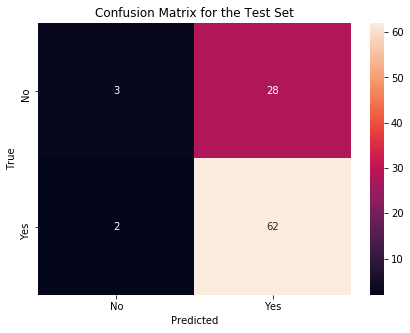

In [19]:
cm_test = confusion_matrix(y_test, clf.predict(X_test))

plt.figure(figsize=(7,5))
sns.heatmap(cm_test, annot=True, xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix for the Test Set')
plt.ylabel('True')
plt.xlabel('Predicted')

### Questão 5 - Pontuação F<sub>1</sub> Final
*Qual é a pontuação F<sub>1</sub> do modelo final para treinamento e teste? Como ele se compara ao modelo que não foi calibrado?*

**Resposta: **

A pontuação do conjunto de treinamento foi de 0.8255 e do conjunto de testes foi de 0.8442 .
O modelo estimado na fase de tunning ficou teve pontuação menor do que o utilizado nos ensaios anteriores, utilizando os parâmetros padrões.
Para uma comparação mais direta, utilizando todos os dados de treinamento e teste, os valores ficam ainda maiores, para o conjunto de treinamento 0.9845 e para o conjunto de testes 0.9697.

> **Nota**: Uma vez que você completou todas as implementações de código e respondeu todas as questões acima com êxito, você pode finalizar seu trabalho exportando o iPython Nothebook como um document HTML. Você pode fazer isso utilizando o menu acima e navegando para  
**File -> Download as -> HTML (.html)**. Inclua a documentação final junto com o notebook para o envio do seu projeto.